In [132]:
from google.colab import files
uploaded = files.upload()

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
from sklearn.model_selection import train_test_split

In [88]:
df = pd.read_csv('hotel_bookings.csv')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [42]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [43]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [44]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


<Axes: >

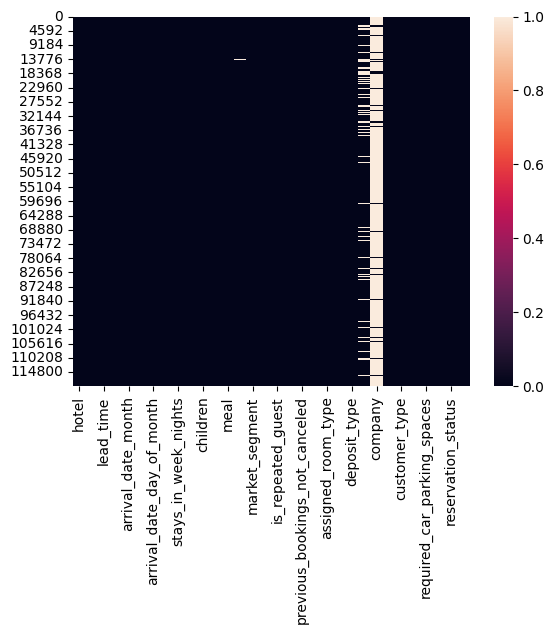

In [45]:
sns.heatmap(df.isnull())

We can see that the company is mostly blank. The deposit type also has a few nulls

<Axes: xlabel='lead_time'>

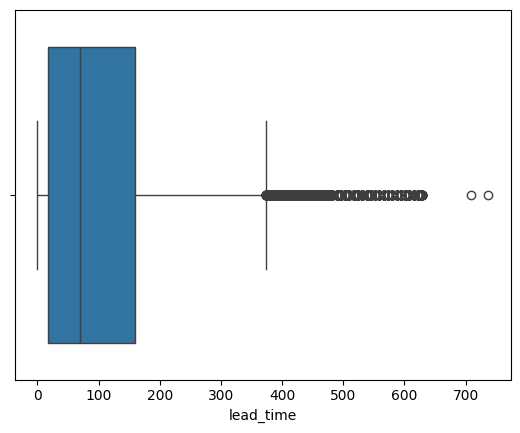

In [46]:
sns.boxplot(x=df["lead_time"])

We can see that there are a few outliers that are >600, so we will cap at 600

<Axes: xlabel='stays_in_weekend_nights'>

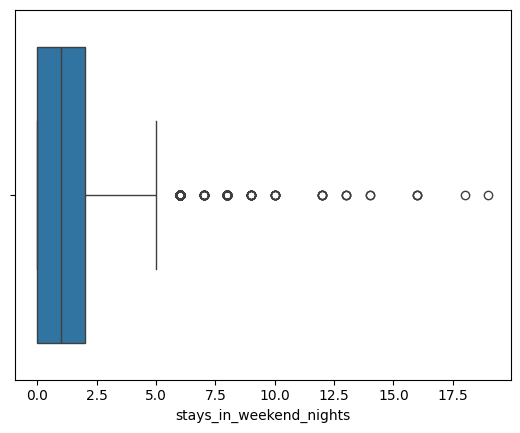

In [47]:
sns.boxplot(x=df["stays_in_weekend_nights"])

we can see most are < 10 so well cap it at 10

<Axes: xlabel='stays_in_week_nights'>

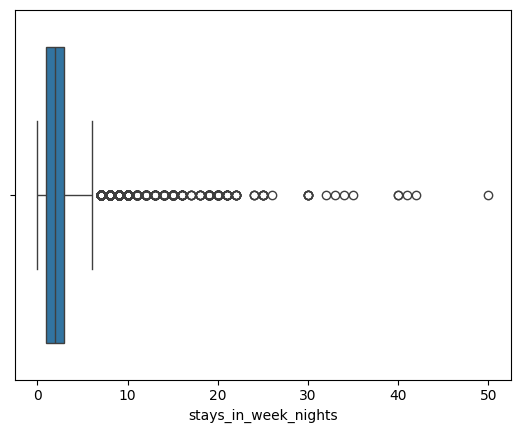

In [48]:
sns.boxplot(x=df["stays_in_week_nights"])

We can see that most are under 20 so well cap it at 20

<Axes: xlabel='adults'>

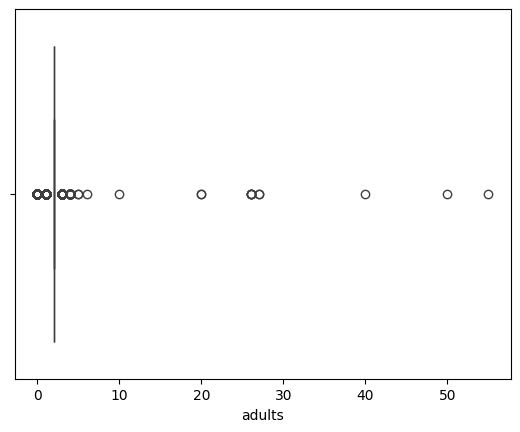

In [49]:
sns.boxplot(x=df["adults"])

Outliers are where adult> 10

<Axes: xlabel='children'>

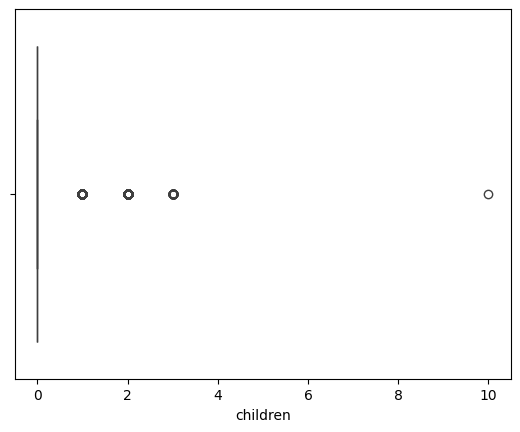

In [50]:
sns.boxplot(x=df["children"])

Outliers are children > 4

<Axes: xlabel='adr'>

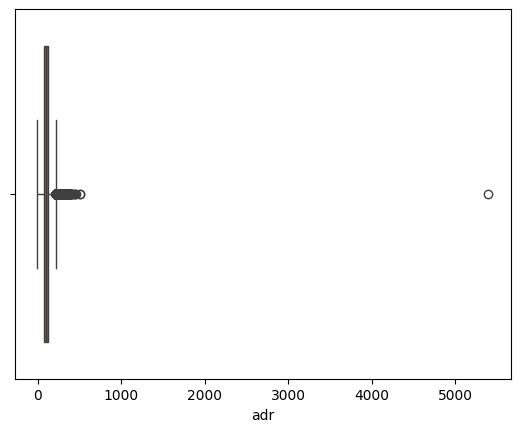

In [51]:
sns.boxplot(x=df["adr"])

Outliers are where adr > 1000

<Axes: xlabel='babies'>

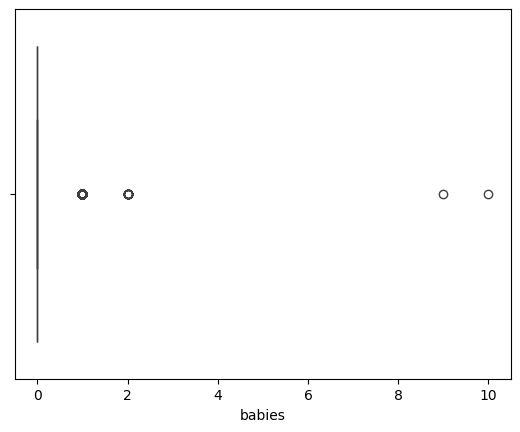

In [52]:
sns.boxplot(x=df["babies"])

Outliers are babies>2

Lets check if all these outliers are in the same row

In [53]:
np.where(df["babies"]>4)

(array([46619, 78656]),)

In [54]:
df.iloc[37297]

,37297
hotel,Resort Hotel
is_canceled,0
lead_time,21
arrival_date_year,2017
arrival_date_month,June
arrival_date_week_number,23
arrival_date_day_of_month,8
stays_in_weekend_nights,2
stays_in_week_nights,3
adults,2


In [55]:
df.iloc[54487]

,54487
hotel,City Hotel
is_canceled,1
lead_time,5
arrival_date_year,2016
arrival_date_month,July
arrival_date_week_number,30
arrival_date_day_of_month,17
stays_in_weekend_nights,2
stays_in_week_nights,3
adults,2


In [56]:
df.duplicated().sum()

np.int64(31994)

In [57]:
missing = pd.DataFrame({
    "Missing Counts: ": df.isnull().sum(),
    "Percentage Missing: ": df.isnull().sum()*100/df.shape[0]
})
missing.sort_values(by="Percentage Missing: ",ascending=False).head()

,Missing Counts:,Percentage Missing:
company,112593,94.306893
agent,16340,13.686238
country,488,0.408744
children,4,0.003350
arrival_date_month,0,0.000000


<Axes: xlabel='agent'>

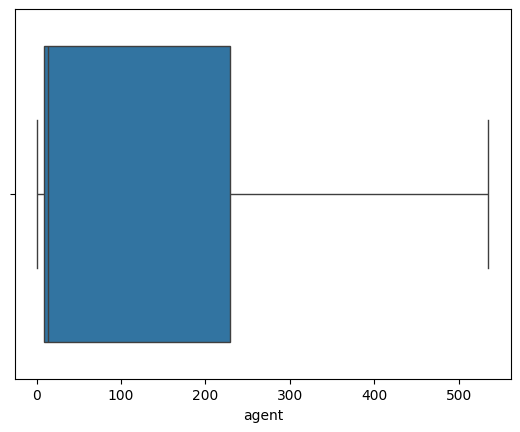

In [58]:
sns.boxplot(x=df["agent"])

# Main findings:
Many Outliers lie within the data in most numerical columns so we will have to cap most of them to the 75% quartile to prevent model unaccuracy.

Around 25% of the dataset is duplicates that will have to be removed.

There are many null values. the company has > 90% null so it will be dropped. Agent, country and children have some null values that will need to be imputed


In [89]:
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]
print(f"Percentage of duplicates row: {100-after*100/before}%")

Percentage of duplicates row: 26.797889270458157%


In [90]:
df = df.drop("company",axis=1)

In [91]:
df["agent"] = df["agent"].fillna(0)

In [92]:
df["country"] = df["country"].fillna(df["country"].mode())

In [93]:
df["children"]=df["children"].fillna(df["children"].median())

In [94]:
df["adr"] = df["adr"].clip(upper=1000)

In [95]:
df["children"].value_counts()

,count
children,
0.0,79032
1.0,4695
2.0,3593
3.0,75
10.0,1


In [96]:
df["children"]=df["children"].clip(upper=3)

In [97]:
df["adults"].value_counts()

,count
adults,
2,64497
1,16503
3,5935
0,385
4,60
26,5
5,2
27,2
20,2


In [98]:
df["adults"] = df["adults"].clip(upper=10)

In [99]:
df["babies"] = df["babies"].clip(upper=2)

In [104]:
df["reservation_status_date"].head()

,reservation_status_date
0,2015-07-01
1,2015-07-01
2,2015-07-02
3,2015-07-02
4,2015-07-03


In [105]:
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"],format="%Y-%m-%d")

In [107]:
df["total_guests"] = df["adults"]+df["children"]+df["babies"]

In [108]:
df["total_nights"] = df["stays_in_weekend_nights"]+df["stays_in_week_nights"]

In [112]:
df["is_family"] = np.where(df["children"]+ df["babies"]>=1,1,0)

In [114]:
df["meal"].value_counts()

,count
meal,
BB,67978
SC,9481
HB,9085
Undefined,492
FB,360


In [115]:
df["market_segment"].value_counts()

,count
market_segment,
Online TA,51618
Offline TA/TO,13889
Direct,11804
Groups,4942
Corporate,4212
Complementary,702
Aviation,227
Undefined,2


In [116]:
df["distribution_channel"].value_counts()

,count
distribution_channel,
TA/TO,69141
Direct,12988
Corporate,5081
GDS,181
Undefined,5


In [117]:
df["deposit_type"].value_counts()

,count
deposit_type,
No Deposit,86251
Non Refund,1038
Refundable,107


In [119]:
df["customer_type"].value_counts()

,count
customer_type,
Transient,71986
Transient-Party,11727
Contract,3139
Group,544


In [120]:
df["reserved_room_type"].value_counts()

,count
reserved_room_type,
A,56552
D,17398
E,6049
F,2823
G,2052
B,999
C,915
H,596
L,6


In [121]:
df = pd.get_dummies(df,columns=["meal","market_segment","distribution_channel","deposit_type","customer_type"])

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87396 non-null  object        
 1   is_canceled                     87396 non-null  int64         
 2   lead_time                       87396 non-null  int64         
 3   arrival_date_year               87396 non-null  int64         
 4   arrival_date_month              87396 non-null  object        
 5   arrival_date_week_number        87396 non-null  int64         
 6   arrival_date_day_of_month       87396 non-null  int64         
 7   stays_in_weekend_nights         87396 non-null  int64         
 8   stays_in_week_nights            87396 non-null  int64         
 9   adults                          87396 non-null  int64         
 10  children                        87396 non-null  float64       
 11  babies

In [125]:
df["country"] = np.where(df["country"].isin(df["country"].value_counts().head(10).index),df["country"],"other")

In [126]:
df["country"].value_counts()

,count
country,
PRT,27453
other,15965
GBR,10433
FRA,8837
ESP,7252
DEU,5387
ITA,3066
IRL,3016
BEL,2081


In [128]:
df = df.drop(columns=["reservation_status","reservation_status_date"])

In [131]:
df_train,df_test = train_test_split(df,test_size=0.2,random_state=42)